In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram
from matplotlib import rcParams # figure size
from sklearn.ensemble import RandomForestClassifier as dtc
from sklearn import tree

In [32]:
df=pd.read_csv("heart1.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
1,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
2,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
3,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
4,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1


In [33]:
cp=pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
thal=pd.get_dummies(df['ca'],prefix='ca',drop_first=True)
slope=pd.get_dummies(df['slope'],prefix='slope',drop_first=True)

In [34]:
df=pd.concat([df,cp,thal,slope],axis=1)
df=df.drop(['cp','ca','slope'],axis=1)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,thal,target,cp_1,cp_2,cp_3,ca_1,ca_2,ca_3,ca_4,slope_1,slope_2
0,77,1,125,304,0,0,162,1,0.0,2,0,0,0,0,0,0,1,0,0,1
1,76,0,140,197,0,2,116,0,1.1,2,1,0,1,0,0,0,0,0,1,0
2,76,0,140,197,0,2,116,0,1.1,2,1,0,1,0,0,0,0,0,1,0
3,76,0,140,197,0,2,116,0,1.1,2,1,0,1,0,0,0,0,0,1,0
4,74,0,120,269,0,0,121,1,0.2,2,1,1,0,0,1,0,0,0,0,1


In [35]:
df = df[["age", "sex", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "thal", "cp_1", "cp_2", "cp_3", "ca_1", 
        "ca_2", "ca_3", "ca_4", "slope_1", "slope_2", "target"]]

In [36]:
df = df.drop(["fbs","restecg","thal"],axis=1)

In [37]:
df['target'] = df['target'].map({0: 'No', 1: 'Yes'})

In [22]:
X_var = df[['age', 'sex', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'cp_1', 'cp_2', 'cp_3', 'ca_1', 'ca_2', 'ca_3', 
           'ca_4', 'slope_1', 'slope_2']].values # independent variable
y_var = df['target'].values # dependent variable

In [38]:
from termcolor import colored as cl # text customization

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.25, random_state = 2)

print(cl('X_train shape : {}'.format(X_train.shape), attrs = ['bold'], color = 'green'))
print(cl('X_test shape : {}'.format(X_test.shape), attrs = ['bold'], color = 'green'))
print(cl('y_train shape : {}'.format(y_train.shape), attrs = ['bold'], color = 'green'))
print(cl('y_test shape : {}'.format(y_test.shape), attrs = ['bold'], color = 'green'))

X_train shape : (466, 16)
X_test shape : (156, 16)
y_train shape : (466,)
y_test shape : (156,)


In [41]:
clf = dtc(criterion='gini',bootstrap=False, max_depth=50, max_features=5, n_estimators=10)
clf=clf.fit(X_train, y_train)

pred_model = clf.predict(X_test)

print(cl('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)), attrs = ['bold']))


Accuracy of the model is 93%


In [42]:
feature_names = df.columns[:16]
target_names = df['target'].unique().tolist()

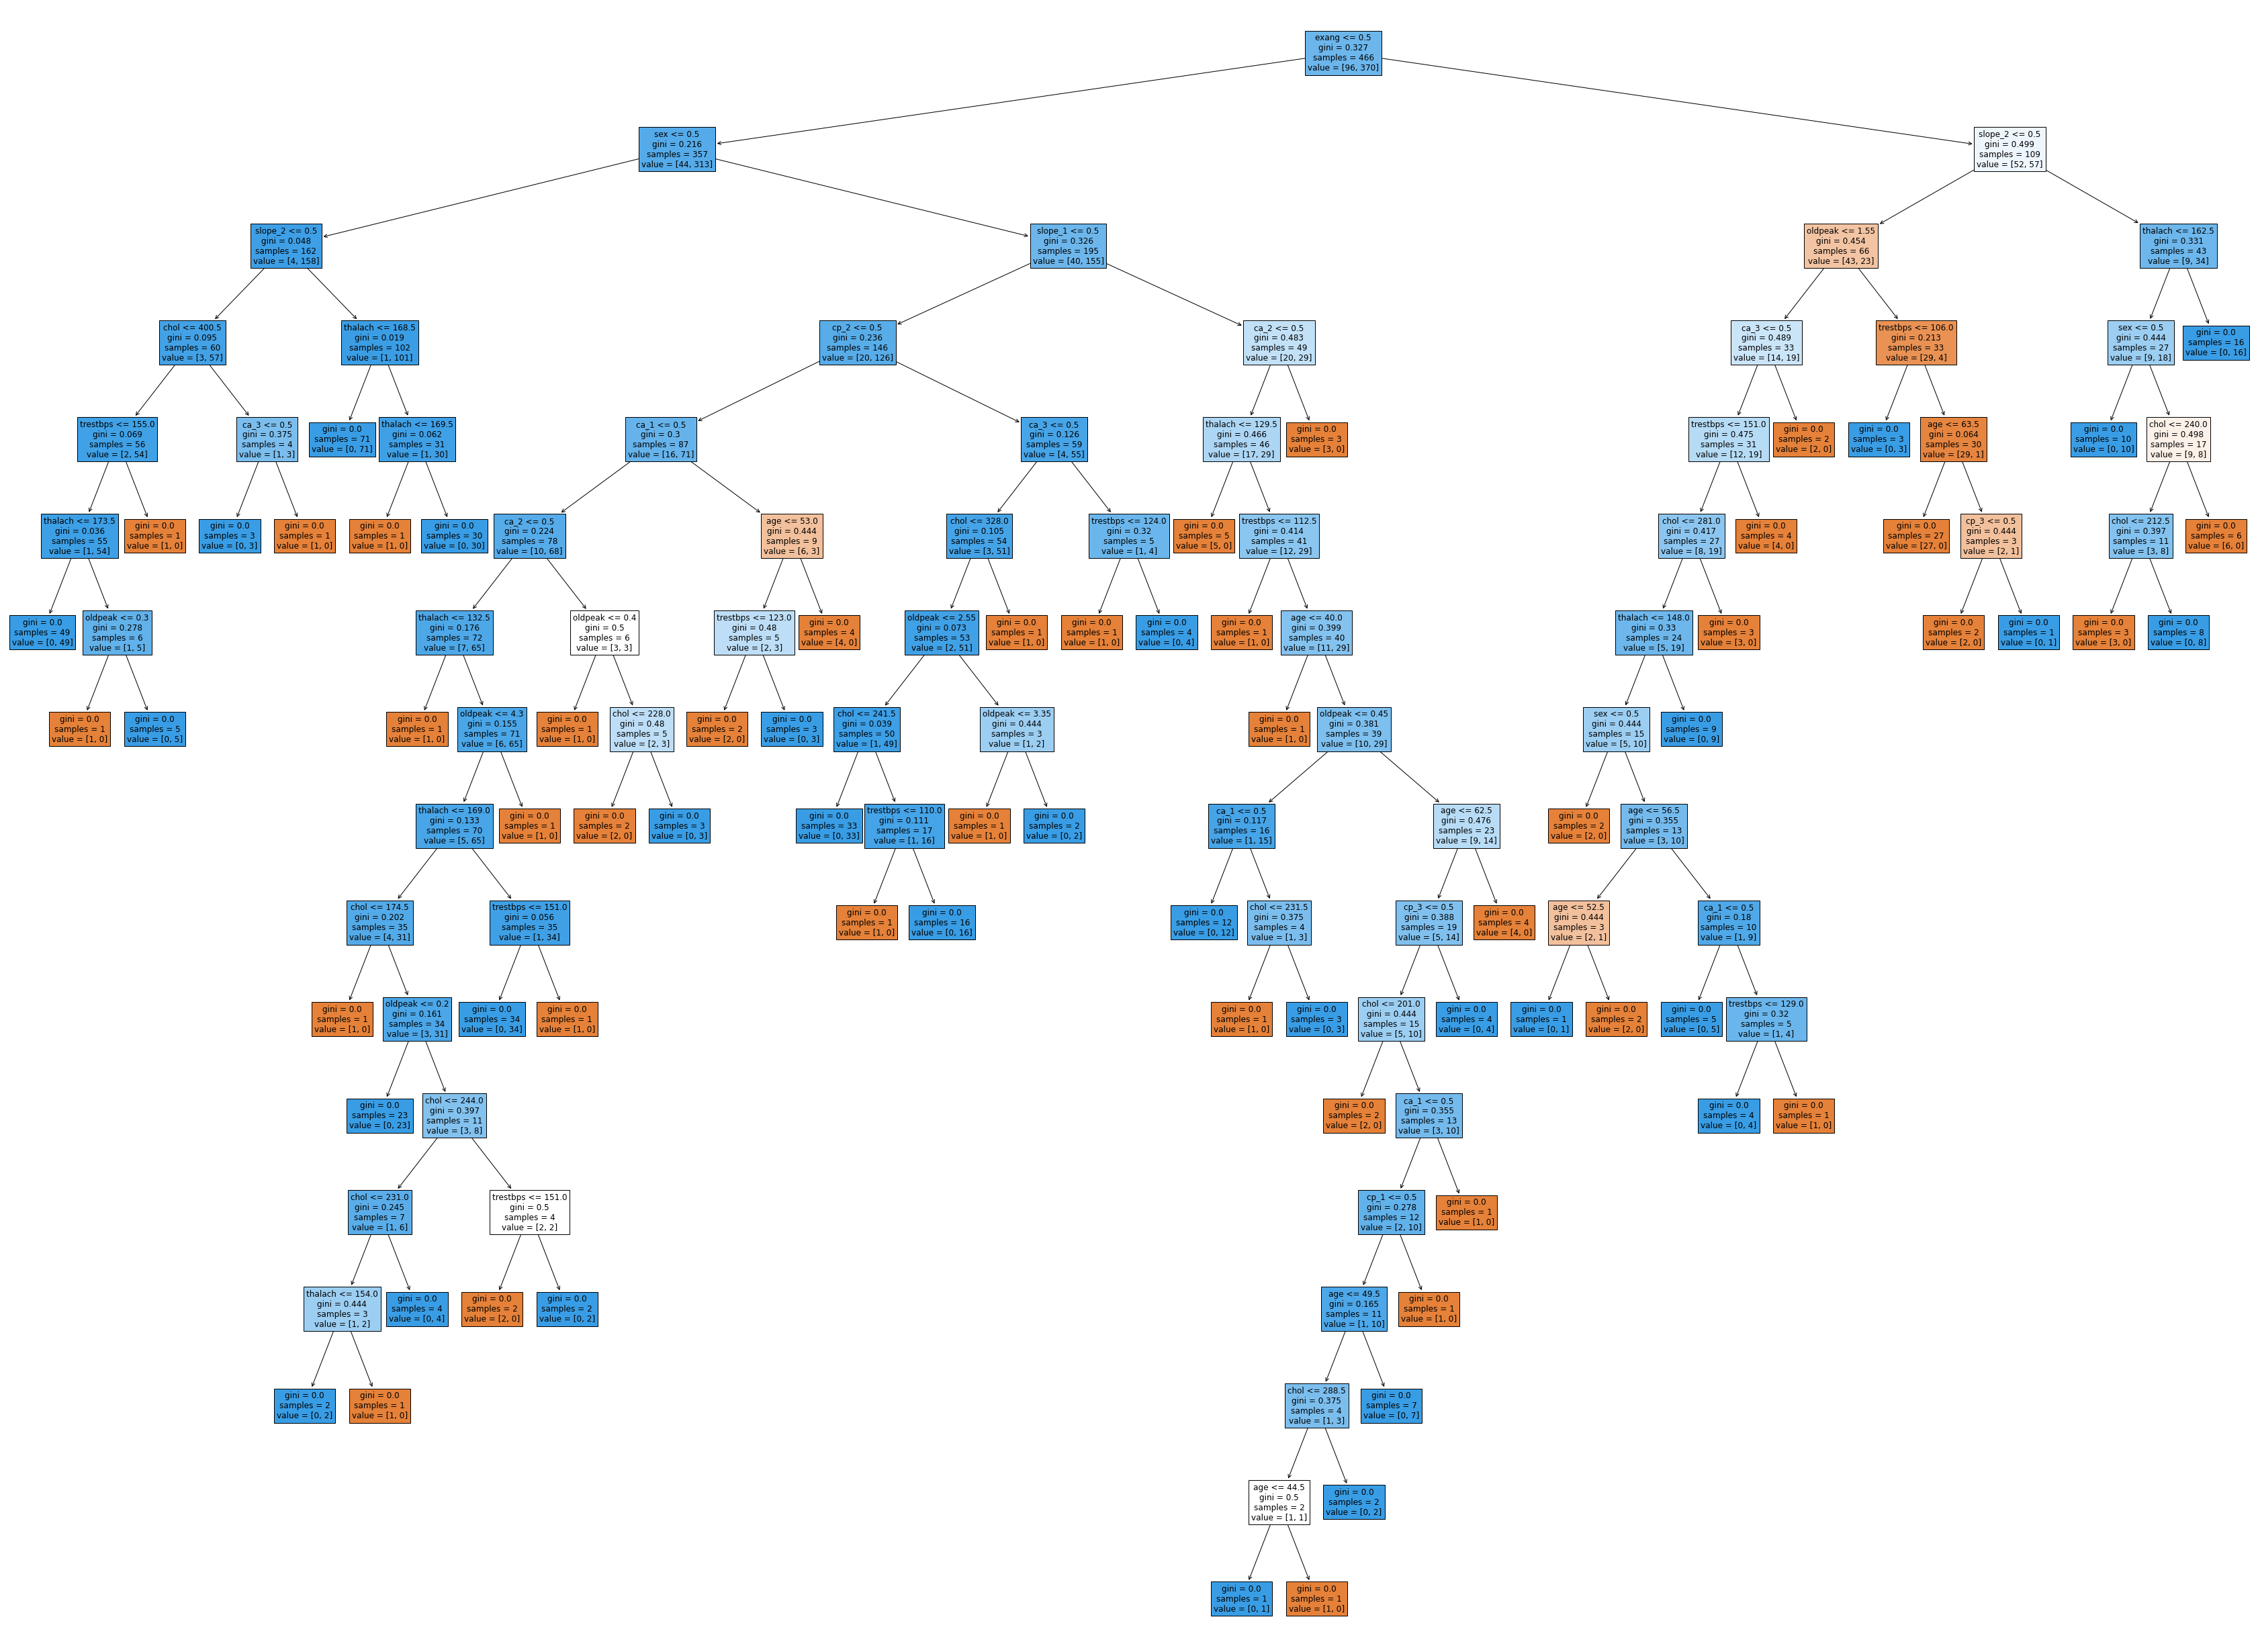

In [43]:
plt.figure(figsize=(60,45))
_ = tree.plot_tree(clf.estimators_[0], feature_names=feature_names, filled=True, fontsize=12)